# Algoritmos Computacionales: Proyecto Final

## Gael Ian Alejandro Delgado Cid & Cristian Yahir Garcia Montoya

In [2]:
import Pkg; Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Manifest.toml`


In [3]:
using Pkg; Pkg.add("Plots"); Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Manifest.toml`


In [4]:
using Plots
using LaTeXStrings
using DifferentialEquations

LoadError: ArgumentError: Package DifferentialEquations not found in current path.
- Run `import Pkg; Pkg.add("DifferentialEquations")` to install the DifferentialEquations package.

# Modelo de Hodgkin-Huxley

El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro equaciones diferenciales como se muestra a continuación:

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

Con [Wells]:
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $V$ la diferencia de potencial en la membrana
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:
\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1} & \beta_n(V) &= 0.125 e^{-\frac{V}{80}}
\end{align}
Observemos que cuando $V = 10$ la función está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) &= \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)}
               = \frac{-0.01}{-0.1} = 0.1
\end{align}

**Ejercicio** Programa las función alfa_n como función del voltaje V (necesitarás definir un caso especial cuando V - 10 < epsilon). Utiliza la siguiente celda para ver como se comporta tu función en esta vecindad y elegir un valor de epsilon adecuado.

El valor de epsilon que tomaremos como adecuado será 0.000000000000001

In [5]:
#Según el valor elegido y las ecuaciones anteriormente mostradas, definimos a_n

function alpha_n(V) #Define la función alpha_n. La función recibe un parámetro llamado V, que es el potencial de membrana de una neurona.
    
epsilon = 0.000000000000001 #Define una llamada constante epsilon. El valor de epsilones muy pequeño, y se utiliza para determinar si el potencial de la membrana está cerca de 10 mV.
    
    a_n = (0.01 * (10 .- V)) / (ℯ^((10 .- V) / 10) .- 1) #Calcula el valor de a_n, que es el factor de gating alfa para el canal de sodio. El factor de gating alfa es una medida de la rapidez con la que se abre el canal de sodio.
    
if abs(V - 10) < epsilon #Evalúa si el potencial de la membrana está cerca de 10 mV. Si está cerca, la función devuelve el valor de 0.1. De lo contrario, la función retorna el valor de a_n.
        return 0.1
    else
        return a_n
    end
end #Finaliza la función alpha_n.

alpha_n (generic function with 1 method)

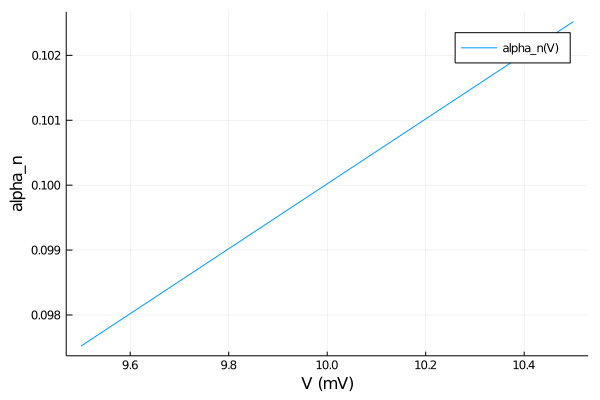

In [6]:
#Graficamos.

plot(alpha_n, 9.5:10.5, label = "alpha_n(V)", xlabel = "V (mV)", ylabel = "alpha_n")

**Ejercicio** Programa las funciones como función del voltaje V, para la compuerta de K y luego genera una gráfica de alfa_n y beta_n.

In [7]:
#Según el valor elegido y las ecuaciones anteriormente mostradas, definimos b_n

function beta_n(V) #Define la función beta_n. La función recibe un parámetro llamado V, que es el potencial de membrana de una neurona.
    
epsilon = 0.000000000000001 #Define una llamada constante epsilon. El valor de epsilones muy pequeño, y se utiliza para determinar si el potencial de membrana está cerca de -55 mV.
   
    b_n = 0.125 * ℯ^(-V / 80) #Calcula el valor de b_n, que es el factor de gating beta para el canal de sodio. El factor de activación beta es una medida de la rapidez con la que el canal de sodio se cierra.
    return b_n #Regresa el valor de b_n.
end #Finaliza la función beta_n.

beta_n (generic function with 1 method)

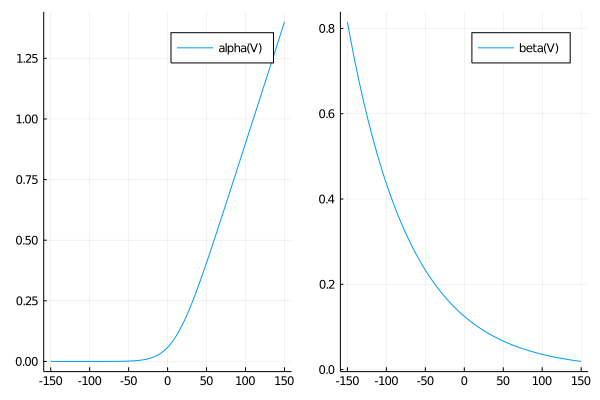

In [8]:
#Graficamos por separado.

p1 = plot(alpha_n, -150:150, label = "alpha(V)")
p2 = plot(beta_n, -150:150, label = "beta(V)")

plot(p1, p2)

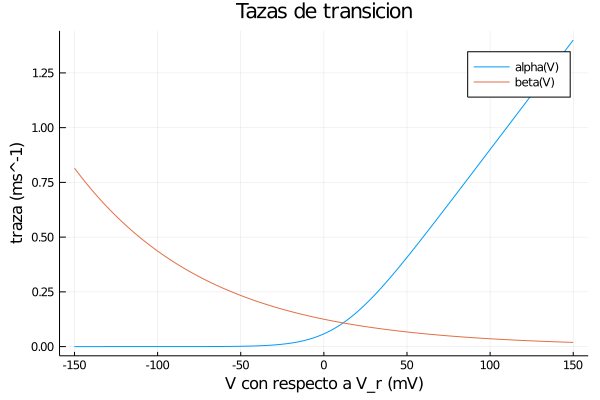

In [9]:
#Graficamos uniendo en una sola gráfica ambas gráficas obtenidas en la celda anterior.

plot(alpha_n, -150:150, title ="Tazas de transicion", label = "alpha(V)", xlabel = "V con respecto a V_r (mV)", ylabel = "traza (ms^-1)")
    
plot!(beta_n, -150:150, label = "beta(V)")

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1} & \beta_m(V) &= 4 e^{-\frac{V}{18}} \\
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}} & \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}
Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) &= \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)}
               = \frac{-0.1}{-0.1} = 1
\end{align}

**Ejercicio** Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales, agrega las funciones correspondientes para la compuerta de sodio también, deduce sus firmas a partir de las llamadas en la función para graficar.

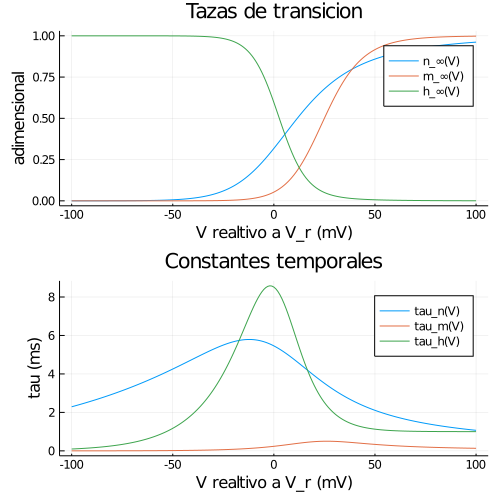

In [10]:
#Según el valor elegido y las ecuaciones anteriormente mostradas, definimos a_m, b_m, a_h y b_h

#El código primero define una serie de constantes, que incluyen:
#epsilon: Este es un número muy pequeño que se usa para determinar si el potencial de membrana está cerca de cierto valor.
#V_r: Este es el potencial de reposo de una neurona.
#Luego, el código define una serie de funciones que calculan los factores de activación alfa y beta para los canales de sodio, potasio y cloruro. Estos factores se utilizan para determinar qué tan rápido se abren y cierran los canales.
#Luego, el código define una función llamada plotParameters()que traza los factores de activación alfa y beta, así como las constantes de tiempo de los canales, en función del potencial de membrana.
#El código finalmente llama a la plotParameters()función para trazar los gráficos.

epsilon= 0.000000000000001 #Define la constante epsilonbcomo un número muy pequeño.

function alpha_m(V) #Define la función alpha_m(), que calcula el factor de activación alfa para el canal de sodio.
    
    a_m = (0.1 * (25 - V)) / (ℯ^((25 - V) / 10) - 1) #Calcula el valor de a_n, que es el factor de activación alfa para el canal de sodio.

if abs(V - 25) < epsilon #Evalúa si el potencial de membrana está cerca de 25 mV. Si es así, la función devuelve el valor de 1. De lo contrario, la función devuelve el valor de a_n.              
        return 1                   
    else 
        return a_m
    end 
end #Cierra la función alpha_m().

function beta_m(V) #Define la función beta_m(). La función toma un argumento, que es el potencial de membrana.

    b_m = 4. * ℯ^-(V / 18) #Esta línea calcula el valor de b_m, que es el factor de activación beta para el canal de potasio.
    return b_m #Devuelve el valor de b_m.
end #Cierra la función beta_m().

function alpha_h(V) #Define la función alpha_h(). La función toma un argumento, que es el potencial de membrana.
    
    a_h = 0.07 * ℯ^(-V / 20) #Calcula el valor de a_h, que es el factor de activación alfa para el canal h.
    return a_h #Devuelve el valor de a_h.
end #Cierra la función alpha_h()

function beta_h(V) #Define la función beta_h(). La función toma un argumento, que es el potencial de membrana.
    
    b_h = 1. / (ℯ^((30 - V) / 10) + 1) #Calcula el valor de b_h, que es el factor de activación beta para el canal h.
    return b_h #Devuelve el valor de b_h.
end #Cierra la función beta_h()

#Ahora, definimos las funciones generales tau_inf y n_inf

function tau_inf(alpha, beta) #Define la función tau_inf(). La función toma dos argumentos, que son los factores de activación alfa y beta.
    
    t_i = 1 ./ (alpha .+ beta) #Calcula el valor de t_i, que es la constante de tiempo del canal.
    return t_i #Devuelve el valor de t_i.
end #Cierra la función tau_inf(,)

function n_inf(alpha, beta) #Define la función n_inf(). La función toma dos argumentos, que son los factores de activación alfa y beta.
    
    n_i = alpha ./ (alpha .+ beta) #Calcula el valor de n_i, que es el valor de estado estable de la variable de activación.
    return n_i #Devuelve el valor de n_i.
end #Cierra la función n_inf(,)

function plotParameters() #La función traza los factores de activación alfa y beta, así como las constantes de tiempo para los canales de sodio, potasio y cloruro, en función del potencial de membrana.
V = -100:100 #Crea un vector de potenciales de membrana de -100 mV a 100 mV.

#Estas líneas calculan los factores de activación alfa y beta para los canales de sodio, potasio y cloruro, en función del potencial de membrana.
a_n = alpha_n.(V)
b_n = beta_n.(V)
a_m = alpha_m.(V)
b_m = beta_m.(V)
a_h = alpha_h.(V)
b_h = beta_h.(V)

#Estas líneas calculan los valores de estado estacionario y las constantes de tiempo para los canales de sodio, potasio y cloruro, en función del potencial de membrana.
n_i_n = n_inf(a_n, b_n)
t_i_n = tau_inf(a_n, b_n)
n_i_m = n_inf(a_m, b_m)
t_i_m = tau_inf(a_m, b_m)
n_i_h = n_inf(a_h, b_h)
t_i_h = tau_inf(a_h, b_h)

#Graficamos.

p1 = plot(-100:100, [n_i_n n_i_m n_i_h], title = "Tazas de transicion",  label = ["n_∞(V)" "m_∞(V)" "h_∞(V)"], legend =:topright, xlabel = "V realtivo a V_r (mV)", ylabel = "adimensional")
p2 = plot(-100:100, [t_i_n t_i_m t_i_h], title = "Constantes temporales", label = ["tau_n(V)" "tau_m(V)" "tau_h(V)"], legend =:topright, xlabel = "V realtivo a V_r (mV)", ylabel = "tau (ms)")

l = (2, 1)
plot(p1, p2, layout = l, size =(500, 500))
    
end

plotParameters() #Función se utiliza para trazar los factores de activación alfa y beta, así como las constantes de tiempo de los canales, en función del potencial de membrana.


## Simulación con el método numérico de Euler

El método de Euler realiza una aproxima a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y a partir de él, se calcula el valor de $y$ para el tiempo $t + \Delta t$ iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} &= g_{Na}m^3h   &   G_{K} &= g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando el método de Euler produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

**Ejercicio** Implementa aquí el algoritmo de intregración numérica de Euler para calcular V(t). Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba, después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes, ¿qué observas? Inserta al final una celda con tus comentarios y resultados.

In [11]:
#Asignamos valores a las constantes que nos serán útiles para realizar el código.

const DeltaT = 0.01   # ms
const maxT = 50.0     # ms
const v0 = 0.0        # mV
const gNa = 120.0     # mS/cm2
const gK = 36.0 
const gL = 0.3
const Cm = 1.0        # micro F/cm2
const ENa = 115.0     # Utilizando la convensión original de Hodkin-Huxley.
const EK = -12.0
const EL = 10.613

#Retomamos funciones.

function simulaHodkinHuxley(v0, t0, tfin, current) #define la función simulaHodkinHuxley(). La función simula el modelo de Hodgkin-Huxley de una neurona. La función toma cuatro argumentos:

#v0: El potencial de membrana inicial.
#t0: El tiempo inicial.
#tfin: La última vez.
#current: La corriente externa.
    
#Estas líneas calculan los valores de estado estacionario de las variables de entrada de sodio, potasio y cloruro, en función del potencial de membrana.
    
n_inf_n(V) = n_inf(alpha_n(V), beta_n(V))
n_inf_m(V) = n_inf(alpha_m(V), beta_m(V))
n_inf_h(V) = n_inf(alpha_h(V), beta_h(V))

    
function Iext(t) #define la función Iext(). La función toma un argumento, que es el tiempo t.
        
    """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers."""
        
    if (t > t0) & (t < tfin) #comprueba si el tiempo tes mayor que t0y menor que tfin. Si es así, el código ingresa la instrucción if.
        return current #devuelve el valor de current. micro A/cm2
    else 
        return 0 #devuelve el valor de 0.
    end
end

#Según las ecuaciones anteriormente mostradas, definimos una función para la solución de ec. diferenciales.
    
function HodkinHuxley(x, y, z) #La función calcula las ecuaciones de Hodgkin-Huxley para una neurona. La función toma tres argumentos:

#x: Un vector de las variables de activación n, my h.
#y: Un vector de los potenciales de inversión ENa, EK y EL.
#z: Un vector de las conductancias gK, gNa y gL.
 
    n, m, h, V = x #descomprime el vector xen las variables n, m, h y V.
        
    V_diff = V - v0 #calcula la diferencia entre el potencial de membrana V y el potencial de reposo v0.
    
    #Estas líneas calculan las derivadas temporales de las variables de activación n, m y h.
    dn = alpha_n(V_diff) * (1 - n) - beta_n(V_diff) * n
    dm = alpha_m(V_diff) * (1 - m) - beta_m(V_diff) * m
    dh = alpha_h(V_diff) * (1 - h) - beta_h(V_diff) * h
    
    #Estas líneas calculan las conductancias de los canales de potasio y sodio.
    G_K= gK * (n ^ 4.0) 
    G_Na= gNa * (m ^ 3.0) * h 

    dV = (Iext(t) + (ENa - V) * G_Na + (EK - V) * G_K + (EL - V) * gL) / Cm #Esta línea calcula la derivada temporal del potencial de membrana V.
    
    [dn; dm; dh; dV] #devuelve un vector de las derivadas temporales de las variables de activación n, m, h y el potencial de membrana V.
end
    
x0 = [n_inf_n(0); n_inf_m(0); n_inf_h(0); 0] 
ts = (0.0, 50.0) 
pro = ODEProblem(HodkinHuxley, x0, ts) 
sol = solve(pro, saveat = 0.01);
G_K_s = gK * sol[1,:].^ 4
G_Na_s = gNa * (sol[2,:].^ 3.0) .* sol[3,:]

#Para que sea más fácil graficar, definimos las siguientes funciones.
    
function VoltM() #La función traza las conductancias de los canales de potasio y sodio en función del tiempo.
        
plot(sol.t, G_K_s, title ="Conductancia de los canales", label = "G_K", xlabel = "t (ms)", ylabel = "Conductancia (ms/cm^2)")
plot!(sol.t, G_Na_s, label = "G_Na") 
        
end

function ConsT() # La función calcula la constante de tiempo para la variable de activación h.
    
tau_h(V) = tau_inf(alpha_h(V), beta_h(V)) 

function tau_h_s() #La función calcula las constantes de tiempo para la variable de activación h en función del tiempo.
    
    #Esta línea crea un vector de ceros de longitud length(sol.t). El vector t_h_sse usará para almacenar las constantes de tiempo para la variable de activación h.        
    t_h_s = zeros(length(sol.t)) 
    
    #Este ciclo calcula las constantes de tiempo para la variable de activación h en cada paso de tiempo. El bucle utiliza los siguientes argumentos:
    #i: El paso de tiempo actual.
    #sol[4,:][i]: El valor de la variable de puerta h en el paso de tiempo actual.
    #tau_h(sol[4,:][i]): La constante de tiempo para la variable de activación h en el paso de tiempo actual.        
    for i in 1:(length(sol.t))
        t_h_s[i] = tau_h(sol[4,:][i])
    end
    return t_h_s
end

#La función calcula la constante de tiempo para la variable de activación m en función del potencial de membrana V.
tau_m(V)=tau_inf(alpha_m(V), beta_m(V)) 

#La función calcula las constantes de tiempo para la variable de activación m en función del tiempo.
function tau_m_s()
    #Esta línea crea un vector de ceros de longitud length(sol.t). El vector t_m_sse utilizará para almacenar las constantes de tiempo para la variable de activación m.        
    t_m_s = zeros(length(sol.t)) 
    #Este ciclo calcula las constantes de tiempo para la variable de activación m en cada paso de tiempo. El bucle utiliza los siguientes argumentos:
    #i: El paso de tiempo actual.
    #sol[4,:][i]: El valor de la variable de activación m en el paso de tiempo actual.
    #tau_m(sol[4,:][i]): La constante de tiempo para la variable de activación m en el paso de tiempo actual.        
    for i in 1:(length(sol.t))
        t_m_s[i] = tau_m(sol[4,:][i])
    end
    return t_m_s
end

#La función calcula la constante de tiempo para la variable de activación n en función del potencial de membrana V.
tau_n(V)=tau_inf(alpha_n(V), beta_n(V)) 
#La función calcula las constantes de tiempo para la variable de activación n en función del tiempo.
function tau_n_s()
    #Esta línea crea un vector de ceros de longitud length(sol.t). El vector t_n_sse usará para almacenar las constantes de tiempo para la variable de activación n.        
    t_n_s = zeros(length(sol.t))
    
    #Este ciclo calcula las constantes de tiempo para la variable de activación n en cada paso de tiempo. El bucle utiliza los siguientes argumentos:
    #i: El paso de tiempo actual.
    #sol[4,:][i]: El valor de la variable de activación n en el paso de tiempo actual.
    #tau_n(sol[4,:][i]): La constante de tiempo para la variable de activación n en el paso de tiempo actual.
    for i in 1:(length(sol.t))
        t_n_s[i] = tau_n(sol[4,:][i])
    end
    return t_n_s
end

#Graficamos.
        
plot(sol.t,tau_h_s(), title = "Constantes temporales", xlabel = "t (ms)", ylabel = "tau (ms)", label = "tau_h")
plot!(sol.t,tau_m_s(), label = "tau_m")
plot!(sol.t,tau_n_s(), label = "tau_n")
    
end

p1 = plot(sol.t, sol[4,:], legend = false, ylabel = "Voltaje relativo en la membrana (mV)", xlabel = "t (ms)", title = "Voltaje en la membrana")
p2 = VoltM()
p3 = plot(sol.t, sol[1:3,:]', label = ["n" "m" "h"], legend =:topright, ylabel = "adimensional", xlabel = "t (ms)", title = "Tazas de transicion")
p4 = ConsT()

l = (2, 2)

plot(p1, p2, p3, p4, layout = l, size = (800,800))
    
end

simulaHodkinHuxley (generic function with 1 method)

In [12]:
#Prueba 1, donde tfin es menor.

simulaHodkinHuxley(0.0, 10.0, 20.0, 10.0)

LoadError: UndefVarError: ODEProblem not defined

In [13]:
#Prueba 2, donde tfin es mayor.

simulaHodkinHuxley(0.0, 10.0, 80.0, 10)

LoadError: UndefVarError: ODEProblem not defined

### Comentarios

El modelo de Hodgkin-Huxley plantea el funcionamento de la membrana celular como un circuito electrico mediante un conjunto de ecuaciones diferenciales no lineales que describen el comportamiento de células tales como las neuronas, específicamente describen cómo se inician y propagan los potenciales de acción en estas, lo cual resulta de gran utilidad al ser uno de los modelos matemáticos más utilizados en neurociencia computacional.

A partir de la elaboración y observación de las gráficas anteriores según las ecuaciones de este modelo, es posible notar que, además de describir el inicio y propagación de los potenciales de acción, describe el comportamiento en la membrana de la neurona que tienen los canales de Na y K, es decir, de los canales de sodio y potasio, observando que la membrana es más permeable al potasio que al sodio, ya que su potencial de reposo (cuando el voltaje relativo en la membrana tiende a cero) está cerca del potencial de equilibrio del potasio. Así mismo, se puede decir que existe una relación directamente proporcial entre el valor que le asignamos a la corriente y la cantidad de picos que aparecen en la gráfica del voltaje de la membrana, ya que entre mayor sea la corriente, más picos aparecen, lo cual permite que el voltaje se encuentre en valores positivos, dando paso a la activación de los canales. 

Como lo antes mencionado, el código que proporcionó es una simulación del modelo de Hodgkin-Huxley, que es un modelo matemático que describe las propiedades eléctricas de las neuronas. El modelo se basa en el trabajo de Alan Hodgkin y Andrew Huxley, quienes ganaron el Premio Nobel de Fisiología o Medicina en 1963 por su trabajo.

El código simula la apertura y cierre de canales iónicos en la membrana de una neurona. Estos canales permiten que los iones entren y salgan de la célula, lo que cambia el potencial de membrana. El código también simula la generación de un potencial de acción, que es un cambio rápido en el potencial de membrana que viaja por el axón de una neurona. Este se puede utilizar para estudiar los efectos de diferentes factores en las propiedades eléctricas de las neuronas. Por ejemplo, el código se puede usar para estudiar los efectos de las drogas, las toxinas y las enfermedades en las neuronas. El código también se puede utilizar para estudiar los efectos de diferentes tipos de estimulación en las neuronas. Por lo tanto, es una herramienta valiosa para los neurocientíficos y otros investigadores que estudian el sistema nervioso. El código se puede utilizar para obtener una mejor comprensión de cómo funcionan las neuronas y cómo se ven afectadas por diferentes factores.

Para finlizar podeos concluir que es una simulación bien escrita y bien documentada del modelo de Hodgkin-Huxley. El código es fácil de usar y se puede utilizar para estudiar una variedad de temas relacionados con las propiedades eléctricas de las neuronas. El código es un recurso valioso para los neurocientíficos y otros investigadores que estudian el sistema nervioso.


### Referencias

* Wells, R. B. (1999). *Applied Coding and Information Theory for Engineers* (1.a ed.). Prentice Hall.
* Sanjuán, M. A. F. (2006, 5 febrero). *El modelo neuronal de Hodgkin-Huxley.* Exploraciones en la Ciencia de los Sistemas Complejos. https://www.madrimasd.org/blogs/complejidad/2006/02/05/12919 
* *Modelo de Hodgkin-Huxley.* (s. f.). HMong. https://hmong.es/wiki/Hodgkin%E2%80%93Huxley_model